![picture](https://drive.google.com/uc?id=1MLll5WHIxUjASLOaiCPbq0iCJdltTRrN)



# A Gentle Introduction to Machine Learning for Environmental/Meteorological Science

*   Brody Wilton and Dr Anna-Louise Ellis



---
### Overview

This notebook covers a very simple explanation of what machine learning is, an explanation of some types of of machine learning, a brief explanation of what a neural network is and a demonstrable and workable example using meteorological data.

### Prerequisites

On order to play with the examples in this notebook, you will have to have internet access and you will need to ensure you have signed up for a free google colab account

https://research.google.com/colaboratory/faq.html





    


### Learning Outcomes

*   You will gain a simple understanding of the mechanics of a basic type of machine learning that may be used to predict certain weather phenonema
*   You may be able to extend this further to more complex models and data with the further resources that have been given at the end of the notebook

---


### What IS Machine Learning?
"“At its heart, machine learning is the task of making computers more intelligent without explicitly teaching them how to behave. It does so by identifying patterns in data – especially useful for diverse, high-dimensional data such as images and patient health records.” –Bill Brock, VP of engineering at Very

"“You don’t tell a child to move their left foot in a circle on the left pedal in the forward direction while moving your right foot in a circle… You give them a push and tell them to keep the bike upright and pointed forward: the overall objective. They fall a few times, honing their skills each time they fail,” - Timothy Havens, director of the Institute of Computing and Cybersystems

Thats it in a nutshell.


### Unsupervised Learning

![picture](https://drive.google.com/uc?id=1h0Y0L7iT8cKAOO2p9cbu3Fw3rfd6Lkmj)






### Supervised Learning

![picture](https://drive.google.com/uc?id=1uO0CaptSZ1HZDKjZEXGaMANbX-SvYI_A)




### Regression vs Classification

![picture](https://drive.google.com/uc?id=1VCSDLKQlyuMxExw78pMoqX2xU4tlZhhH)




### The Multi-Layer Perceptron



![picture](https://drive.google.com/uc?id=1ux5vVEBkY3xQgTvfwwE_KecKNLYl317W)



##### Cunha, Barbara & Droz, Christophe & Zine, Abdelmalek & Foulard, Stéphane & Ichchou, Mohamed. (2022). A Review of Machine Learning Methods Applied to Structural Dynamics and Vibroacoustic. 


In [ ]:
%%html
<iframe src='https://gfycat.com/ifr/HauntingEveryGreatwhiteshark' frameborder='0' scrolling='no' allowfullscreen width='640' height='404'></iframe>


### But what IS a neural network?
https://www.youtube.com/watch?v=aircAruvnKk

## Time for some code 
First of all we will be using the tensorflow python librairies throughout this tutorial.  There are a wealth of tutorials and resources available for this particular "flavour" of machine learning platform and all can be used in your colab environment.

https://www.tensorflow.org/tutorials. 



In [ ]:
import os

import numpy as np
import pandas as pd
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from IPython.display import HTML, Javascript
Javascript("element.innerHTML = '<b>Congratulations, you have successfully run the first code cell</b>'")

<IPython.core.display.Javascript object>

### About the Data and it's Preparation

In almost all Machine Learning exercises there lies a significant amount of work in preparing real data for models to be able to learn from them in a structured manner.  The dataset we have chosen for the purpose of this session has had most of this work already carried out for us.

The Jena Climate Dataset is a weather timeseries dataset recorded at the weather station of the Max Planck Institute for Biogeochemistry in Jena, Germany.  It is made up of 14 different observation types (such air temperature, atmospheric pressure, humidity, wind direction, and so on) that were recorded every 10 minutes, over several years. This dataset covers data from January 1st 2009 to December 31st 2016.

We can access this dataset online through the tensorflow library calls below:

 

In [ ]:
folder_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(folder_path)

13582336/13568290 [==============================] - 1s 0us/step


The Jena Climate Dataset is fortunately tabular in nature and we have some minor additions to make to it to ensure it able to readily be processed by our model.  We will be using the Pandas Python library for the small amount of data preparation and additions that we will need to do and create a 'dataframe' from our csv file.

On completion we will then reduce the dataset down to hourly records instead of the existing every ten minutes that has been recorderd.  We are in essence taking a snapshot of all 14 observations, once every hour.

We're also popping the date time column out to manipulate it in the future, as the date time string isn't a particularly helpful format for our model.

In [ ]:
df = pd.read_csv(csv_path)
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


Now we're turning our date and time into time signals which will be some additional information that we may provide the model with

In [ ]:
#the Date Time column is very useful, but not in this string form. Start by converting it to seconds:
timestamp_s = date_time.map(datetime.datetime.timestamp)
#A simple approach to convert it to a usable signal is to use sin and cos to convert the time to clear "Time of day" and "Time of year" signals:

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Let's have a look at the new dataset that we have for the model

In [ ]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Day sin,Day cos,Year sin,Year cos
count,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,7.009100e+04,7.009100e+04,70091.000000,70091.000000
mean,989.212842,9.450482,283.493086,4.956471,76.009788,13.576576,9.533968,4.042536,6.022560,9.640437,1216.061232,1.702567,2.963041,174.789095,-6.083156e-05,-1.428652e-04,0.001614,-0.000672
std,8.358886,8.423384,8.504424,6.730081,16.474920,7.739883,4.183658,4.898549,2.655812,4.234862,39.974263,65.447512,75.597657,86.619431,7.070992e-01,7.071245e-01,0.706813,0.707408
min,913.600000,-22.760000,250.850000,-24.800000,13.880000,0.970000,0.810000,0.000000,0.510000,0.810000,1059.450000,-9999.000000,-9999.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000
25%,984.200000,3.350000,277.440000,0.240000,65.210000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.300000,-7.071068e-01,-7.071068e-01,-0.704504,-0.708115
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.980000,198.100000,1.321740e-14,-9.732065e-15,0.003316,-0.001122
75%,994.720000,15.480000,289.530000,10.080000,89.400000,17.610000,12.360000,5.300000,7.800000,12.490000,1242.765000,2.860000,4.740000,234.000000,7.071068e-01,7.071068e-01,0.708301,0.707423
max,1015.290000,37.280000,311.210000,23.060000,100.000000,63.770000,28.250000,46.010000,18.070000,28.740000,1393.540000,14.010000,23.500000,360.000000,1.000000e+00,1.000000e+00,1.000000,1.000000


Most observations from sensors have inaccurate readings at times and the Jena dataset is no different.  As we can see in the print out of the dataframe description, the wind velocity and max wind velocity have some wildly inaccuracte measurements of -9999.0m/s.  Let's change those to be 0 which is a more likely measurement

In [ ]:
wind_velocity = df['wv (m/s)']
bad_wind_velocity = wind_velocity == -9999.0
wind_velocity[bad_wind_velocity] = 0.0

max_wind_velocity = df['max. wv (m/s)']
bad_max_wind_velocity = max_wind_velocity == -9999.0
max_wind_velocity[bad_max_wind_velocity] = 0.0

The cell below takes the wind speed measurements and converts them into wind vectors on the x and y plane

In [ ]:
wind_velocity = df.pop('wv (m/s)')
max_wind_velocity = df.pop('max. wv (m/s)')

#convert degrees measurement to radians [X * pi / 180]
wind_radian = df.pop('wd (deg)') * np.pi / 180

#calculate the wind X and Y components for the vector
df['Wx'] = wind_velocity * np.cos(wind_radian)
df['Wy'] = wind_velocity * np.sin(wind_radian)

#calculate the max wind X and Y components for the vector
df['Max Wx'] = max_wind_velocity * np.cos(wind_radian)
df['Max Wy'] = max_wind_velocity * np.sin(wind_radian)


### Training, Validation and Test sets

![picture](https://drive.google.com/uc?id=1_hKhACaS5SyMkdVSWD0XHozYoGHMfjwx)

https://medium.com/@Ana_Caballero_H/splitting-data-folders-into-training-validation-and-testing-folders-using-shuffling-with-python-63cabcd997dd

We will be picking some columns from this dataframe to use for the training and test values.

Here you have the opportunity to swap in and out different column names to the observations to see what effect it has in the model's 'predicting power'

In [ ]:
# training data columns to use (tip - there are much better ones to pick)
column_names = ['p (mbar)', 'Max Wx','Max Wy','Day sin', 'Day cos','Year sin', 'Year cos']


#we could use these or any other variation we might like
#column_names = [''Wx','Wy', 'Day sin', 'Day cos','Year sin', 'Year cos']

Let's create the X (training/validation/test data(multiple columns)) and  y (training/validation/test labels(single column)) datasets explicitly now.  In effect we are going to give the model a set of data and we want it to learn how that set (many observations), maps to a single value.  The training data columns ['p (mbar)',.....etc...., 'Day sin', 'Day cos','Year sin', 'Year cos'] will be used to try and predict 'T (degC)' - temperature at a later date to that which is in the training set

In [ ]:
X, y = df[column_names], df['T (degC)']

We're splitting the datasets up into train/validation/test datasets with a 64%/16%/20% split

In [ ]:
#64% train, 16% validation and 20% test split 

#create test/train batches
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#create train/val batches
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)

\\
### Standardising/Normalising Datasets

Deep Neural Networks often require that data is standardised/normalised; they don't work very well when values are wildly different. This ensures that they're all within the same range.

When we do this we must ensure that we only work with our training data mean and standard deviation to standardise the validation and test sets.  The reason being that we shouldn't know what the validation and test set data is in reality.

Note: In many professions, "normalisation" typically means that the range of values are "normalised to be from 0.0 to 1.0". "Standardisation" typically means that the range of values are "standardised" to measure how many standard deviations the value is from its mean. 

In [ ]:
y_test[0:5]

336437    17.93
336443    16.92
336449    15.82
336455    15.02
336461    14.14
Name: T (degC), dtype: float64

In [ ]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()


X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std


y_train_mean = y_train.mean()
y_train_std = y_train.std()


y_train = (y_train - y_train_mean) / y_train_std
y_test = (y_test - y_train_mean) / y_train_std
y_val = (y_val - y_train_mean) / y_train_std



X_train

,p (mbar),Max Wx,Max Wy,Day sin,Day cos,Year sin,Year cos
5,0.933803,0.099313,0.219876,0.365864,1.365914,-0.019173,1.468425
11,0.948246,0.097621,0.229701,0.706935,1.224633,-0.018163,1.468414
17,0.974726,0.099391,0.325544,0.999819,0.999886,-0.017154,1.468403
23,0.992781,0.235838,0.147454,1.224557,0.706991,-0.016144,1.468391
29,1.049352,0.036463,0.403165,1.365833,0.365907,-0.015134,1.468378
...,...,...,...,...,...,...,...
252299,-0.021886,-0.269931,-1.125680,0.860742,1.121858,-1.384035,0.450442
252305,0.007002,-0.244005,-0.919708,1.121786,0.860804,-1.383748,0.451419
252311,0.071998,-0.245830,-1.238578,1.306372,0.541079,-1.383460,0.452396
252317,0.102089,-0.367275,-0.249004,1.401921,0.184472,-1.383171,0.453373



### Building Our Model

We need to construct the physical structure of our Multi Layer Perceptron (MLP) with it's nodes and layers but first we need to know the number of observations (features) we're feeding into the model to correctly provide the model with the shape of the data it will be receiving.  The code cell below shows us that we have 42054 hourly training timesteps and 7 features (observations) per hour.

In [ ]:
print(X_train.shape)

(42054, 7)


In [ ]:
n_features = X_train.shape[1]
n_features

7

There are many ways to make an MLP in tensorflow.  For simplicities sake we will use tensorflow's 'Sequential Model' in this example, which simply let's us incrementally stack the input, then the neuron layers on top of each other and then reduce it down to a single output. We can now create our model.  Notice how the input shape is the amount of features we're providing it with. 

We can add many more layers here, but the more layers we add the longer the training will take.  We also have to be mindful of the deeper we make this neural network, the more likely we are to 'overfit' to our data and render the model unable to 'generalise' well.  This code cell is a good point to experiment with adding and removing layers and following the tensorflow tutorial notebooks https://colab.research.google.com/github/tensorflow/docs/blob/snapshot-keras/site/en/guide/keras/sequential_model.ipynb



In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(n_features,)))
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(1))

Once we've defined what our model should look like we have to 'compile' it so that the structure is made.  We can then print a summary of information and plot the model's layers.  (The input is ignored as it isn't a layer).

In [ ]:
model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,931
Trainable params: 1,931
Non-trainable params: 0
_________________________________________________________________


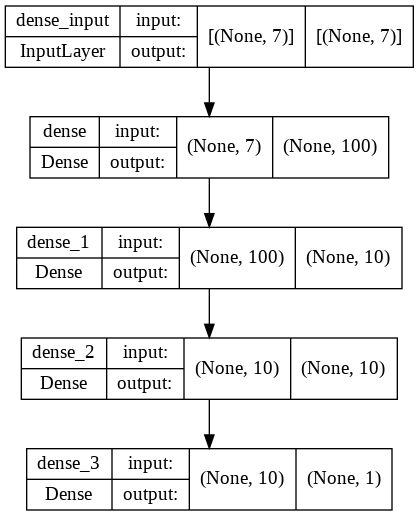

In [ ]:
plot_model(model, show_shapes=True)

Here's an optional early callback, this has been added as a way to stop the model early if changes less than 0.00001 are detected across 5 epochs of training

In [ ]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

Let's fit the model and print the loss and accuracy

In [ ]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[early_stop_callback])


Epoch 1/100
1315/1315 [==============================] - 6s 3ms/step - loss: 0.4107 - root_mean_squared_error: 0.5243
Epoch 2/100
1315/1315 [==============================] - 3s 3ms/step - loss: 0.4047 - root_mean_squared_error: 0.5158
Epoch 3/100
1315/1315 [==============================] - 3s 3ms/step - loss: 0.4040 - root_mean_squared_error: 0.5149
Epoch 4/100
1315/1315 [==============================] - 3s 3ms/step - loss: 0.4033 - root_mean_squared_error: 0.5141
Epoch 5/100
1315/1315 [==============================] - 3s 3ms/step - loss: 0.4029 - root_mean_squared_error: 0.5138
Epoch 6/100
1315/1315 [==============================] - 3s 3ms/step - loss: 0.4026 - root_mean_squared_error: 0.5133
Epoch 7/100
1315/1315 [==============================] - 3s 3ms/step - loss: 0.4029 - root_mean_squared_error: 0.5138
Epoch 8/100
1315/1315 [==============================] - 3s 3ms/step - loss: 0.4020 - root_mean_squared_error: 0.5129
Epoch 9/100
1315/1315 [==============================] -

Now let's plot the loss curve to see how the model performed in training over time

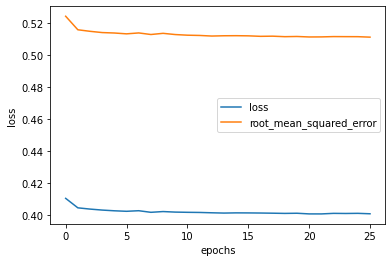

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Now let present the model with our validation set - here we could start some hyperparameter tuning, perhaps how many epochs we think we should train it for, or maybe, when we are compiling our model's layers it would give us the optimum number of "neurons" to give our first dense layer (or the learning rate for the Adam optimiser).  For time and simplicities sake we won't cover these options here, and we are simply using our validation set as a means of evaluating how well the model is doing on the new data.

In [ ]:
loss, acc = model.evaluate(X_val, y_val)
print("Validation accuracy: %.3f" % acc)

439/439 [==============================] - 1s 2ms/step - loss: 0.3803 - root_mean_squared_error: 0.4788
Validation accuracy: 0.479


Finally we shall use the held out test data to get the trained model to provide some predictions and see how this compares with our "truth".

In [ ]:
# Make and plot predictions for model_1
y_preds = model.predict(X_test)


In [ ]:
y_preds[0:5]

array([[0.7592318 ],
       [0.7184806 ],
       [0.6506947 ],
       [0.59843457],
       [0.50873625]], dtype=float32)

Lets reverse our "standardisation" so we can see the actual temperature values it is predicting

In [ ]:
y_preds_unstandardised = y_preds*y_train_std+y_train_mean
y_preds_unstandardised[0:5]


array([[15.710136 ],
       [15.350065 ],
       [14.751121 ],
       [14.289358 ],
       [13.4967985]], dtype=float32)

In [ ]:
y_test[0:5]

336437    1.010466
336443    0.896159
336449    0.771666
336455    0.681125
336461    0.581531
Name: T (degC), dtype: float64

And do the same for our "truth"

In [ ]:
y_test_unstandardised = y_test*y_train_std+y_train_mean
y_test_unstandardised[0:5]

336437    17.93
336443    16.92
336449    15.82
336455    15.02
336461    14.14
Name: T (degC), dtype: float64

In [ ]:
def numfmt(x, pos): # your custom formatter function: divide by 100.0
    s = '{:.2f}'.format(x / 24.0)
    return s

import matplotlib.ticker as tkr
xfmt = tkr.FuncFormatter(numfmt)

Finally lets create a plot so we can can visually compare what our predicitions and actual values look like

Text(0.5, 1.0, 'Change in temperature')

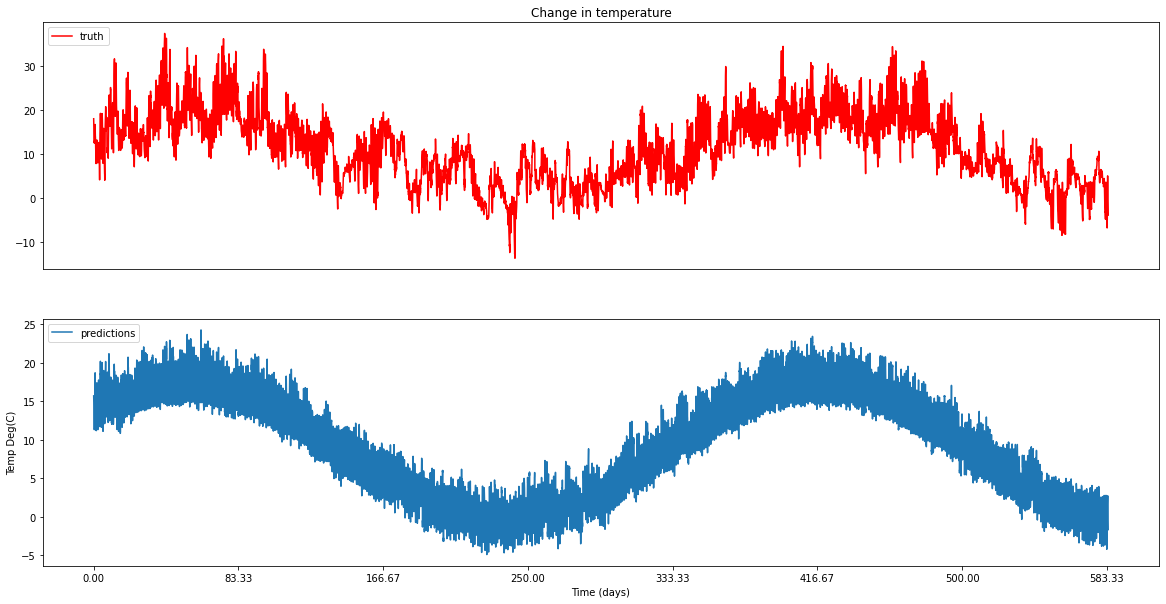

In [ ]:
# plt.plot(y_preds)
# plt.plot(y_test)
plt.rcParams["figure.figsize"] = (20,10)
#create two subplots
f, (ax1, ax2) = plt.subplots(2)
f.gca().xaxis.set_major_formatter(xfmt)
ax1.plot(y_test_unstandardised,"r-",label="truth")
ax1.legend(loc="upper left")
ax1.set_xticks([])
ax1.set_xticklabels([])
ax2.plot(y_preds_unstandardised, label="predictions")
ax2.legend(loc="upper left")

plt.xlabel('Time (days)')
plt.ylabel('Temp Deg(C)')
ax1.set_title('Change in temperature')



## Next steps 

The next notebook we have for you to try uses a different type of dataset - The Bristol Air Quality Dataset but the same type of MLP.  You may start to discover some of the extra options that are available to you with the tensorflow layers by using the reference below (and others).


## References

https://www.tensorflow.org/tutorials/structured_data/time_series


## Disclaimer

This Google CoLab Jupyter is a scientific product and is not official communication of the Met OFFICE. All Met Office Google CoLab Jupyter notebooks are provided on an 'as is' basis and the user assumes responsibility for its use. 